# Earthquake dataset

**We will create a machine learning model to predict the magnitude of an earthquake**

#### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#### Reading the dataset

In [2]:
df = pd.read_csv('Earthquake.csv')

In [3]:
df.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,1/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,1/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,1/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,1/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,1/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

*The dataset has 9 categorical columns and 12 numerical columns. Some columns have missing values. *The shape of the dataframe shows that there 23412 rows in the dataset and 21 columns/features**

In [5]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [6]:
df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

*There are high number of missing values for the columns Depth Error, Depth Seismic Stations, Magnitude Error, Magnitude Seismic Stations, Azimuthal Gap, Horizontal Distance and Horizontal Error. We can drop these columns as they large number of missing values. For Root Mean Square column, we can replace the missing values with mean/median value*

In [7]:
df = df.drop(['Magnitude Error', 'Magnitude Seismic Stations', 'Horizontal Distance', 'Horizontal Error'], axis=1)

In [8]:
df.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Azimuthal Gap,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,1/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,1/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,1/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,1/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,1/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [9]:
df.isnull().sum()

Date                          0
Time                          0
Latitude                      0
Longitude                     0
Type                          0
Depth                         0
Depth Error               18951
Depth Seismic Stations    16315
Magnitude                     0
Magnitude Type                3
Azimuthal Gap             16113
Root Mean Square           6060
ID                            0
Source                        0
Location Source               0
Magnitude Source              0
Status                        0
dtype: int64

*We have dropped the colunms having huge number of missing values*

In [10]:
df = df.dropna(subset=['Magnitude Type'])

In [11]:
df.isnull().sum()

Date                          0
Time                          0
Latitude                      0
Longitude                     0
Type                          0
Depth                         0
Depth Error               18948
Depth Seismic Stations    16312
Magnitude                     0
Magnitude Type                0
Azimuthal Gap             16110
Root Mean Square           6057
ID                            0
Source                        0
Location Source               0
Magnitude Source              0
Status                        0
dtype: int64

*We have dropped the rows corresponding to the 3 missing values in the column Magnitude Type. For the remaining columns with missing values, we will impute the missing values with mean/median*

#### Now we will check for duplicates

In [12]:
df.duplicated().sum()

0

*There are no duplicate rows*

#### Checking for unique values

In [13]:
df.nunique()

Date                      12401
Time                      20469
Latitude                  20673
Longitude                 21471
Type                          4
Depth                      3483
Depth Error                 297
Depth Seismic Stations      736
Magnitude                    64
Magnitude Type               10
Azimuthal Gap              1109
Root Mean Square            190
ID                        23409
Source                       12
Location Source              47
Magnitude Source             23
Status                        2
dtype: int64

*The ID column has all unique values and thus it does not contribute to determine the magnitude of the earthquake. So we can drop the ID column*

In [14]:
df = df.drop(['ID'], axis = 1)

In [15]:
df.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic


In [16]:
df.isnull().sum()

Date                          0
Time                          0
Latitude                      0
Longitude                     0
Type                          0
Depth                         0
Depth Error               18948
Depth Seismic Stations    16312
Magnitude                     0
Magnitude Type                0
Azimuthal Gap             16110
Root Mean Square           6057
Source                        0
Location Source               0
Magnitude Source              0
Status                        0
dtype: int64

*The ID column has been dropped*

In [17]:
NaN_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (df[feature].count() < df.shape[0]))]
NaN_features

['Depth Error', 'Depth Seismic Stations', 'Azimuthal Gap', 'Root Mean Square']

C:\Users\nipung\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nipung\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\nipung\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nipung\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\nipung\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nipung\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\nipung\Anaconda3\lib\s

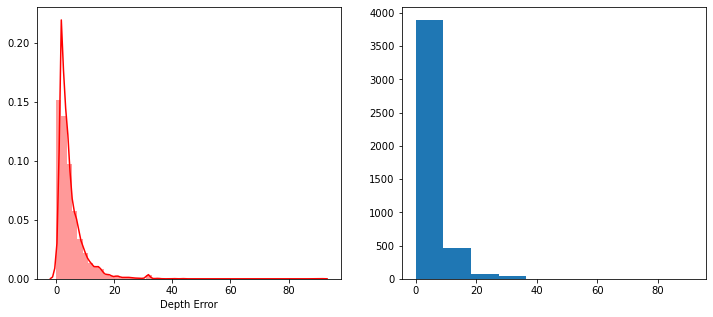

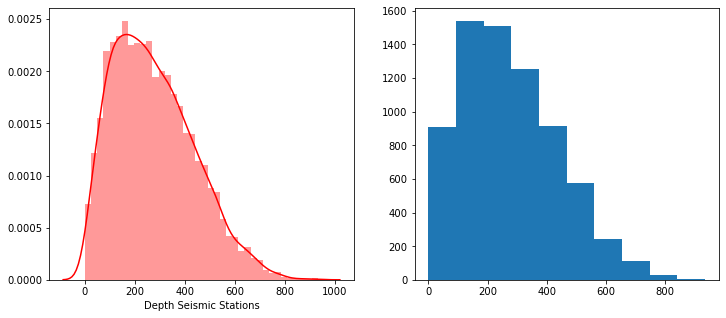

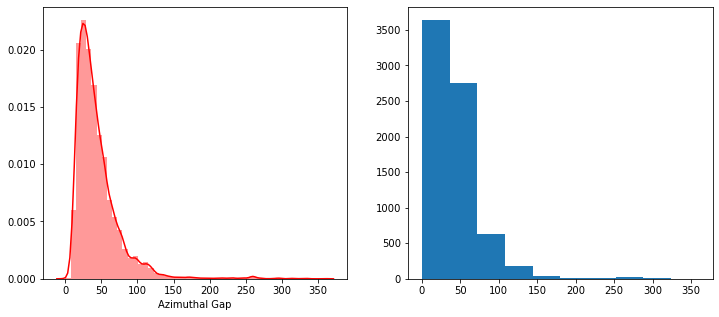

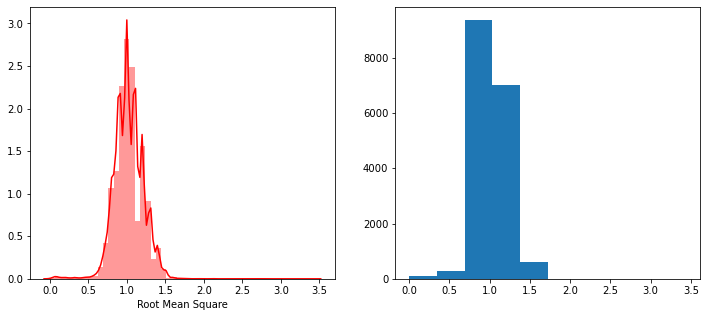

In [18]:
for feature in NaN_features:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(df[feature], color='red')
    plt.subplot(1,2,2)
    plt.hist(df[feature])

*These above plotted features have missing values. We need to impute the missing values in these columns. Since there is skewness in these features like **Depth Error**, **Depth seismic stations** and **Azimuthal gap**, we must use median to impute for these columns. For **Root mean square**, we can use mean to impute*

In [19]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Azimuthal Gap,Root Mean Square
count,23409.000000,23409.000000,23409.000000,4461.000000,7097.000000,23409.000000,7299.000000,17352.000000
mean,1.674322,39.660642,70.775695,4.993115,275.364098,5.882553,44.163532,1.022784
std,30.112233,125.506701,122.657829,4.875184,162.141631,0.423087,32.141486,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000
25%,-18.656000,-76.311300,14.540000,1.800000,146.000000,5.600000,24.100000,0.900000
50%,-3.570000,103.993000,33.000000,3.500000,255.000000,5.700000,36.000000,1.000000
75%,26.158000,145.027000,54.000000,6.300000,384.000000,6.000000,54.000000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,360.000000,3.440000


In [20]:
df['Depth Error'] = df['Depth Error'].fillna(df['Depth Error'].median())

In [21]:
df['Depth Seismic Stations'] = df['Depth Seismic Stations'].fillna(df['Depth Seismic Stations'].median())

In [22]:
df['Azimuthal Gap'] = df['Azimuthal Gap'].fillna(df['Azimuthal Gap'].median())

In [23]:
df['Root Mean Square'] = df['Root Mean Square'].fillna(df['Root Mean Square'].mean())

In [24]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Azimuthal Gap,Root Mean Square
count,23409.000000,23409.000000,23409.000000,23409.000000,23409.000000,23409.000000,23409.000000,23409.000000
mean,1.674322,39.660642,70.775695,3.784539,261.173865,5.882553,38.545415,1.022784
std,30.112233,125.506701,122.657829,2.207348,89.762165,0.423087,18.340849,0.162329
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000
25%,-18.656000,-76.311300,14.540000,3.500000,255.000000,5.600000,36.000000,0.940000
50%,-3.570000,103.993000,33.000000,3.500000,255.000000,5.700000,36.000000,1.022784
75%,26.158000,145.027000,54.000000,3.500000,255.000000,6.000000,36.000000,1.100000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,360.000000,3.440000


C:\Users\nipung\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\nipung\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\nipung\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


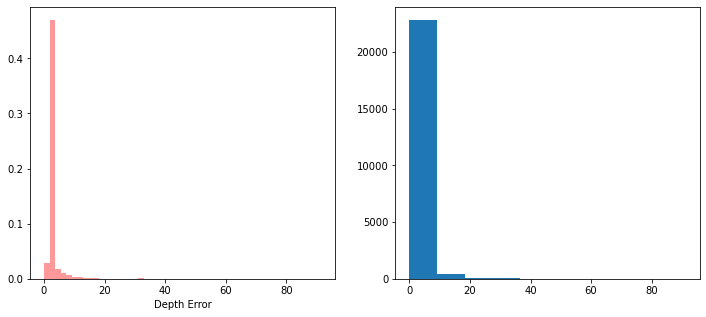

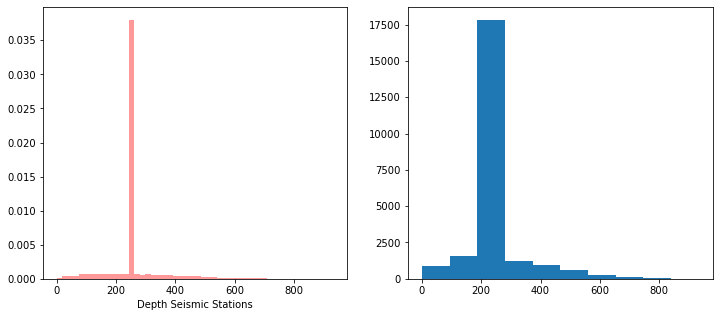

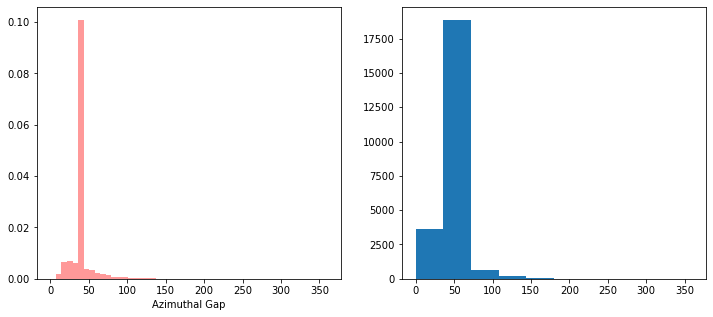

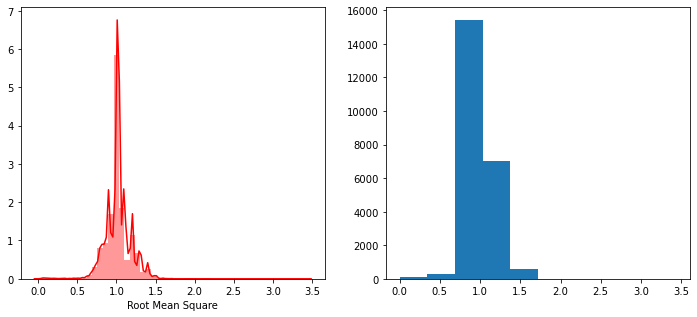

In [25]:
for feature in NaN_features:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(df[feature], color='red')
    plt.subplot(1,2,2)
    plt.hist(df[feature])

In [26]:
df.isnull().sum()

Date                      0
Time                      0
Latitude                  0
Longitude                 0
Type                      0
Depth                     0
Depth Error               0
Depth Seismic Stations    0
Magnitude                 0
Magnitude Type            0
Azimuthal Gap             0
Root Mean Square          0
Source                    0
Location Source           0
Magnitude Source          0
Status                    0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23409 entries, 0 to 23411
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    23409 non-null  object 
 1   Time                    23409 non-null  object 
 2   Latitude                23409 non-null  float64
 3   Longitude               23409 non-null  float64
 4   Type                    23409 non-null  object 
 5   Depth                   23409 non-null  float64
 6   Depth Error             23409 non-null  float64
 7   Depth Seismic Stations  23409 non-null  float64
 8   Magnitude               23409 non-null  float64
 9   Magnitude Type          23409 non-null  object 
 10  Azimuthal Gap           23409 non-null  float64
 11  Root Mean Square        23409 non-null  float64
 12  Source                  23409 non-null  object 
 13  Location Source         23409 non-null  object 
 14  Magnitude Source        23409 non-null

*Now there are no missing values in the dataset*

#### Plotting a heatmap to see the correlation between the numerical features

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

*We can see that the features are weakly correlated to one another.* The pearson correlation of all the featurs is between -0.31 to 0.25*

In [ ]:
numerical_features = df.select_dtypes(np.number).columns
numerical_features

#### Plotting boxplots and distplots to see the outliers and skewness for the numerical features

In [ ]:

def create_boxplots_distplots(dataset):
    for feature in numerical_features:
        plt.figure(figsize=(10,7))
        plt.subplot(2,2,1)
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.boxplot(y=dataset[feature])
        plt.subplot(2,2,3)
        plt.hist(dataset[feature])
        plt.xlabel(feature)
        plt.subplot(2,2,4)
        sns.distplot(dataset[feature].dropna())
        plt.show()
    
create_boxplots_distplots(df)

#### Removing outliers

In [ ]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        outliers = []
        threshold = 3
        mean = np.mean(dataset[feature])
        std = np.std(dataset[feature])
        
        for i in dataset[feature]:
            z_score = (i - mean)/std
            if np.abs(z_score) > threshold:
                outliers.append(i)
        print(outliers)
        print()
        for j in outliers:
            indexNames = dataset[dataset[feature] == j].index
            dataset.drop(indexNames , inplace=True)
        outliers.clear()


remove_outliers(df,numerical_features)

In [ ]:
create_boxplots_distplots(df)

In [ ]:
df.describe()

*The outliers have been removed*

#### Now we will check for multivariate outliers by plotting relplot

In [ ]:
'''
def create_relplot(dataset, list_of_features):
    for feature in list_of_features:
        for bivariate_feature in list_of_features:
            if bivariate_feature != feature:
                plt.figure(figsize=(10,10))
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue='Magnitude')
                plt.show()


create_relplot(df, numerical_features)
'''

In [ ]:
df = df.drop(df[(df['Depth'] > 225)].index)

In [ ]:
df = df.drop(df[(df['Latitude'] < -50)].index)

In [ ]:
df = df.drop(df[(df['Depth Error'] < 1)].index)

In [ ]:
df = df.drop(df[(df['Latitude'] > 60)].index)

In [ ]:
df = df.drop(df[(df['Depth'] > 200) & (df['Depth Error'] > 4)].index)

In [ ]:
df = df.drop(df[(df['Depth'] > 200) & (df['Depth Seismic Stations'] >300)].index)

In [ ]:
df = df.drop(df[(df['Depth'] > 200) & (df['Depth Seismic Stations'] <200)].index)

In [ ]:
df = df.drop(df[(df['Depth'] > 150) & (df['Azimuthal Gap'] > 40)].index)

In [ ]:
df = df.drop(df[(df['Depth'] > 200) & (df['Azimuthal Gap'] < 32)].index)

In [ ]:
df = df.drop(df[(df['Depth'] > 200) & (df['Root Mean Square'] > 1.1)].index)

In [ ]:
df = df.drop(df[(df['Depth'] > 200) & (df['Root Mean Square'] < 0.9)].index)

In [ ]:
df = df.drop(df[(df['Depth'] > 200) & (df['Latitude'] < -10)].index)

*We have removed the multivariate outliers from the dataset*

In [ ]:
df.describe()

In [ ]:
create_boxplots_distplots(df)

*Features including **longitude**, **Depth** and **Magnitude** have skewness*

In [ ]:
df.head(10)

In [ ]:
df.describe()

#### Applying square root transformation to treat skewness

In [ ]:
from scipy.stats import skew

In [ ]:
for feature in numerical_features:
    print(feature, " ", skew(df[feature]))

In [ ]:
skewed_features = ['Depth', 'Depth Error', 'Azimuthal Gap']
for feature in skewed_features:
    df[feature] = np.sqrt(df[feature])

In [ ]:
for feature in numerical_features:
    print(feature, " ", skew(df[feature]))

*Skewness has been handled*

In [ ]:
df.head(10)

#### Analysing categorical features

In [ ]:
categorical_features = df.select_dtypes(np.object).columns
categorical_features

In [ ]:
for feature in categorical_features:
    if feature == 'Date':
        pass
    elif feature == 'Time':
        pass
    else:
        print("Feature : ", feature)
        print(df[feature].value_counts())
        print()

*We can consider the Nuclear explosion and Explosion as 1 single category*

In [ ]:
df["Type"].replace({"Nuclear Explosion": "Explosion"}, inplace=True)

*For the above features, we will remove the categories having counts less than 4*

In [ ]:
for feature in categorical_features:
    if feature == 'Date':
        pass
    elif feature == 'Time':
        pass
    elif feature == 'Location Source':
        pass
    else:
        x = df[feature].value_counts().keys().tolist()
        y = df[feature].value_counts().tolist()
        for i in range(len(x)):
            if y[i] < 4:
                index_names = df[df[feature] == x[i]].index
                df.drop(index_names, inplace = True)
        x = None
        y = None

In [ ]:
for feature in categorical_features:
    if feature == 'Date':
        pass
    elif feature == 'Time':
        pass
    else:
        print("Feature : ", feature)
        print(df[feature].value_counts())
        print()

*We can group the categories of **Location Source** column for which the count is less than 29*

In [ ]:
x = df['Location Source'].value_counts().keys().tolist()
y = df['Location Source'].value_counts().tolist()
for i in range(len(x)):
    if y[i] < 29:
        df['Location Source'].replace({x[i]: "Other"}, inplace=True)

In [ ]:
df['Location Source'].value_counts()

In [ ]:
for feature in categorical_features:
    if feature == 'Date':
        pass
    elif feature == 'Time':
        pass
    else:
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        sns.countplot(feature, data=df)
        plt.title(feature)
        plt.subplot(1,2,2)
        plt.pie(df[feature].value_counts(), labels=df[feature].unique(), autopct='%0.2f%%')
        plt.show()
        sns.catplot(x=feature, y='Magnitude', data=df)
        plt.show()        

*From the plots, we can observe that most of the earthquakes are genuine earthquakes whereas very few earthquakes are due to explosions. 99.24% of the earthquakes are genuine earthquakes whereas 0.76% earthquakes are due to explosions. the magnitude of earthquake ranges from 2.35 to approx 2.70 for genuine earthquakes whereas the magnitude varies from 2.35 to 2.55 in the case of explosions*

*Magnitude Type glossary :*

     MWC : centroid
     MWW : (Moment W-phase)(generic notation Mw)
     MB : short-period body wave
     MWB : body wave
     MS : 20 sec surface wave
     MWW : Moment W-phase)(generic notation Mw
     MWR : regional
     ML : local

#### Working with Date and Time values

In [ ]:
df.info()

*Date and Time columns are categorical features. We need to convert Date into datetime object*

In [ ]:
df['Day'] = pd.to_datetime(df.Date, format="%m/%d/%Y").dt.day

In [ ]:
df['Month'] = pd.to_datetime(df.Date, format="%m/%d/%Y").dt.month

In [ ]:
df['Year'] = pd.to_datetime(df.Date, format="%m/%d/%Y").dt.year

In [ ]:
df['Year'].value_counts()

*We can drop the Date column*

In [ ]:
df.drop(['Date'], axis=1, inplace=True)

In [ ]:
df['Hours'] = pd.to_datetime(df['Time']).dt.hour

In [ ]:
df['Minutes'] = pd.to_datetime(df['Time']).dt.minute

In [ ]:
df['Seconds'] = pd.to_datetime(df['Time']).dt.second

*We can drop the Date column*

In [ ]:
df.drop(['Time'], axis=1, inplace=True)

In [ ]:
df.head(5)

In [ ]:
sns.jointplot(y=df['Magnitude'], x=df['Year'], data=df)

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.to_csv('file6.csv')

In [29]:
df = pd.read_csv('file6.csv', index_col='Unnamed: 0')

#### Encoding of categorical variables

In [30]:
df = pd.get_dummies(df, drop_first=True)

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
df.head(5)

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Azimuthal Gap,Root Mean Square,Day,Month,Year,Hours,Minutes,Seconds,Type_Explosion,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Source_ISCGEM,Source_ISCGEMSUP,Source_US,Location Source_GUC,Location Source_ISCGEM,Location Source_Other,Location Source_US,Magnitude Source_HRV,Magnitude Source_ISCGEM,Magnitude Source_NC,Magnitude Source_PAR,Magnitude Source_US,Status_Reviewed
0,19.246,145.616,3.386990,1.367782,255.0,6.0,2.44949,1.022784,2,1,1965,13,44,18,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,1.863,127.352,2.990698,1.367782,255.0,5.8,2.44949,1.022784,4,1,1965,11,29,49,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,-20.579,-173.972,2.114743,1.367782,255.0,6.2,2.44949,1.022784,5,1,1965,18,5,58,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,11.938,126.427,1.967990,1.367782,255.0,5.8,2.44949,1.022784,9,1,1965,13,32,50,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
5,-13.405,166.629,2.432299,1.367782,255.0,6.7,2.44949,1.022784,10,1,1965,13,36,32,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [33]:
m = df.Magnitude
m

0        6.0
1        5.8
2        6.2
4        5.8
5        6.7
        ... 
23392    6.2
23395    6.4
23397    6.0
23398    5.5
23400    5.9
Name: Magnitude, Length: 14712, dtype: float64

In [34]:
df.drop(['Magnitude'], axis=1, inplace=True)

In [35]:
df['Magnitude'] = m

In [36]:
df.head(5)

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Azimuthal Gap,Root Mean Square,Day,Month,Year,Hours,Minutes,Seconds,Type_Explosion,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Source_ISCGEM,Source_ISCGEMSUP,Source_US,Location Source_GUC,Location Source_ISCGEM,Location Source_Other,Location Source_US,Magnitude Source_HRV,Magnitude Source_ISCGEM,Magnitude Source_NC,Magnitude Source_PAR,Magnitude Source_US,Status_Reviewed,Magnitude
0,19.246,145.616,3.386990,1.367782,255.0,2.44949,1.022784,2,1,1965,13,44,18,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,6.0
1,1.863,127.352,2.990698,1.367782,255.0,2.44949,1.022784,4,1,1965,11,29,49,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,5.8
2,-20.579,-173.972,2.114743,1.367782,255.0,2.44949,1.022784,5,1,1965,18,5,58,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,6.2
4,11.938,126.427,1.967990,1.367782,255.0,2.44949,1.022784,9,1,1965,13,32,50,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,5.8
5,-13.405,166.629,2.432299,1.367782,255.0,2.44949,1.022784,10,1,1965,13,36,32,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,6.7


#### Splitting the dataset

In [37]:
X = df.iloc[:, :-1]

In [38]:
y = df.iloc[:,-1]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=124)

In [40]:
X_train.shape

(10298, 33)

In [41]:
X_test.shape

(4414, 33)

In [42]:
y_train.shape

(10298,)

In [43]:
y_test.shape

(4414,)

#### Model Building

*We will create a Linear Regression model*

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
regressor = LinearRegression()

In [46]:
regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
print("Intercept : ", regressor.intercept_)

Intercept :  11.597912184513035


In [48]:
regressor.coef_

array([-3.15770838e-04,  1.36554916e-04, -2.00393600e-02, -3.83504348e-01,
        9.64691635e-04, -2.65123611e-01,  3.90600931e-01,  1.95582962e-04,
       -9.56857927e-04, -2.74751865e-03, -2.18851070e-04,  3.25368692e-04,
       -8.01174340e-05,  1.97524915e-01,  2.89490748e-01,  2.69983685e-01,
        2.89622565e-01,  3.32247948e-01, -1.02590030e-01,  2.67241243e-01,
        3.16294517e-02,  2.18126640e-02, -2.32113869e-02,  2.41752703e-03,
        5.34421157e-02, -6.53188360e-02,  3.96899221e-02,  2.91299641e-02,
        5.34421157e-02,  5.26067521e-01,  1.02178662e+00,  1.39997853e-01,
       -2.32113869e-02])

In [49]:
y_pred = regressor.predict(X_test)

In [50]:
from sklearn import metrics

In [51]:
print("Mean absolute error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error : ", metrics.mean_squared_error(y_test, y_pred))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error :  0.2615138871898166
Mean squared error :  0.11502161944510074
Root mean squared error :  0.3391483737910308


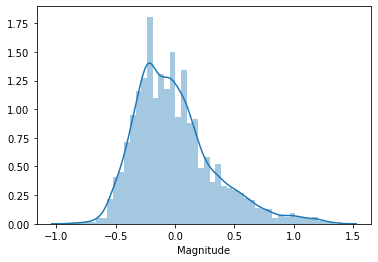

In [52]:
sns.distplot(y_test-y_pred)

In [82]:
y_pred[2109], y_test.tolist()[2109]

(6.383271296581545, 6.7)

*Now we will build RandomForestRegressor model*

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

In [ ]:
rfc = RandomForestRegressor()
rsc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, random_state = 42, verbose = 2, n_jobs=1)

In [ ]:
rsc.fit(X_train, y_train)

In [ ]:
prediction = rsc.predict(X_test)
prediction

In [ ]:
y_test

In [ ]:
rsc.best_params_

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
print("Mean absolute error : ", metrics.mean_absolute_error(y_test, prediction))
print("Mean squared error : ", metrics.mean_squared_error(y_test, prediction))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))